In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [45]:
df=pd.read_csv("./datasets/placement.csv")

In [46]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [47]:
df.shape

(1000, 3)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [49]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [50]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


# Distribution of data

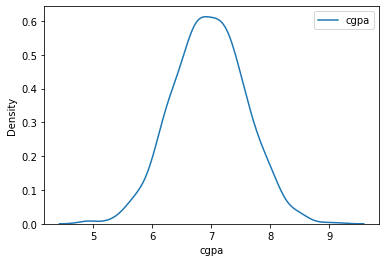

In [51]:
sns.kdeplot(df["cgpa"],label="cgpa")
plt.legend()
plt.show()

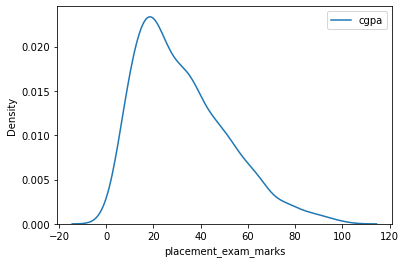

In [52]:
sns.kdeplot(df["placement_exam_marks"],label="cgpa")
plt.legend()
plt.show()

# Outlier Detection and Trimming

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


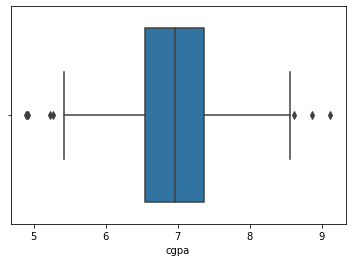

In [53]:
sns.boxplot(df["cgpa"])
plt.show()

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


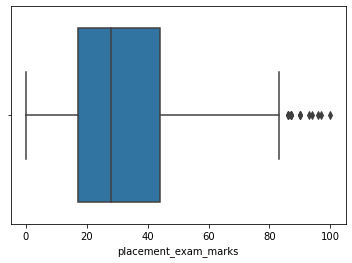

In [54]:
sns.boxplot(df["placement_exam_marks"])
plt.show()

In [55]:
# This code calculate the mean and the standard deviation and also the value which is 99.7 % percentage of the normal distribution(max_value and min_value). 
mean_cgpa=df["cgpa"].mean()
std_cgpa=df["cgpa"].std()
max_value_cgpa=mean_cgpa+3*std_cgpa
min_value_cgpa=mean_cgpa-3*std_cgpa
print(min_value_cgpa)
print(max_value_cgpa)

mean_marks=df["placement_exam_marks"].mean()
std_marks=df["placement_exam_marks"].std()
max_value_marks=mean_marks+3*std_marks
min_value_marks=mean_marks-3*std_marks
print(max_value_marks)
print(min_value_marks)

5.113546374602842
8.808933625397177
89.61746701676324
-25.167467016763247


In [56]:
new_df=df[ ( df["cgpa"]<max_value_cgpa) & (df["cgpa"]>min_value_cgpa) & (df["placement_exam_marks"]<max_value_marks) & (df["placement_exam_marks"]>min_value_marks)]

In [57]:
new_df.shape

(987, 3)

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


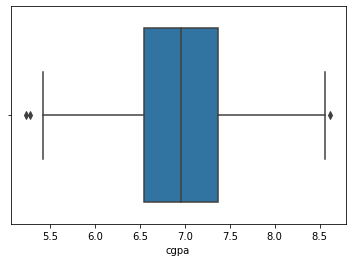

In [58]:
sns.boxplot(new_df["cgpa"])
plt.show()


/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


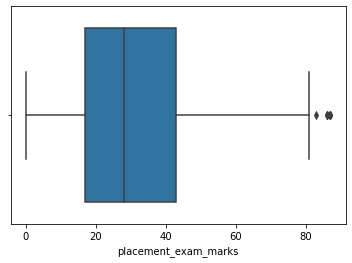

In [59]:
sns.boxplot(new_df["placement_exam_marks"])
plt.show()

# Outlier Detection and Capping

In [60]:
# This code calculate the mean and the standard deviation and also the value which is 99.7 % percentage of the normal distribution(max_value and min_value). 
mean_cgpa=df["cgpa"].mean()
std_cgpa=df["cgpa"].std()
max_value_cgpa=mean_cgpa+3*std_cgpa
min_value_cgpa=mean_cgpa-3*std_cgpa
print(min_value_cgpa)
print(max_value_cgpa)

mean_marks=df["placement_exam_marks"].mean()
std_marks=df["placement_exam_marks"].std()
max_value_marks=mean_marks+3*std_marks
min_value_marks=mean_marks-3*std_marks
print(max_value_marks)
print(min_value_marks)

5.113546374602842
8.808933625397177
89.61746701676324
-25.167467016763247


In [61]:
df["cgpa"]=np.where(
    df["cgpa"]>max_value_cgpa,
    max_value_cgpa,
    np.where(
        df["cgpa"]<min_value_cgpa,
        min_value_cgpa,
        df["cgpa"]
    )
)

In [62]:
df["placement_exam_marks"]=np.where(
    df["placement_exam_marks"]>max_value_marks,
    max_value_marks,
    np.where(
        df["placement_exam_marks"]<min_value_marks,
        min_value_marks,
        df["placement_exam_marks"]
    )
)

In [63]:
df.shape

(1000, 3)

/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


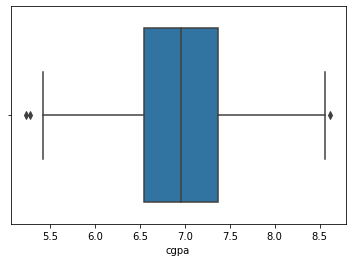

In [64]:
sns.boxplot(new_df["cgpa"])
plt.show()


/home/ajit/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


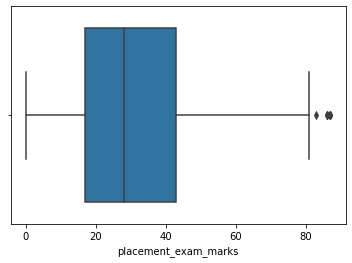

In [65]:
sns.boxplot(new_df["placement_exam_marks"])
plt.show()